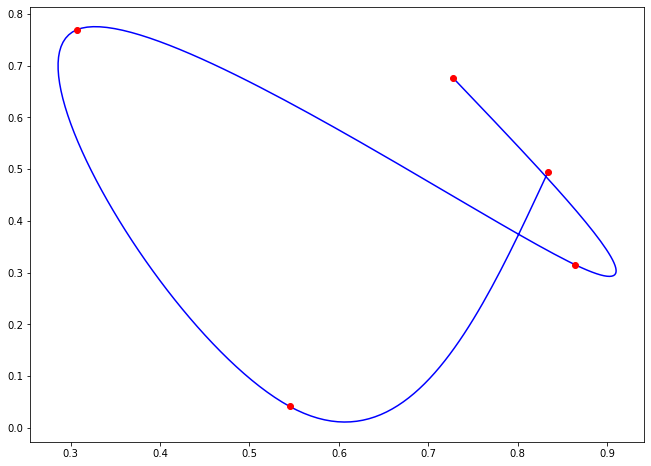

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Function from https://towardsdatascience.com/b%C3%A9zier-interpolation-8033e9a262c2


# find the a & b points
def get_bezier_coef(points):
    # since the formulas work given that we have n+1 points
    # then n must be this:
    n = len(points) - 1

    # build coefficents matrix
    C = 4 * np.identity(n)
    np.fill_diagonal(C[1:], 1)
    np.fill_diagonal(C[:, 1:], 1)
    C[0, 0] = 2
    C[n - 1, n - 1] = 7
    C[n - 1, n - 2] = 2

    # build points vector
    P = [2 * (2 * points[i] + points[i + 1]) for i in range(n)]
    P[0] = points[0] + 2 * points[1]
    P[n - 1] = 8 * points[n - 1] + points[n]

    # solve system, find a & b
    A = np.linalg.solve(C, P)
    B = [0] * n
    for i in range(n - 1):
        B[i] = 2 * points[i + 1] - A[i + 1]
    B[n - 1] = (A[n - 1] + points[n]) / 2

    return A, B

# returns the general Bezier cubic formula given 4 control points
def get_cubic(a, b, c, d):
    return lambda t: np.power(1 - t, 3) * a + 3 * np.power(1 - t, 2) * t * b + 3 * (1 - t) * np.power(t, 2) * c + np.power(t, 3) * d

# return one cubic curve for each consecutive points
def get_bezier_cubic(points):
    A, B = get_bezier_coef(points)
    return [
        get_cubic(points[i], A[i], B[i], points[i + 1])
        for i in range(len(points) - 1)
    ]

# evalute each cubic curve on the range [0, 1] sliced in n points
def evaluate_bezier(points, n):
    curves = get_bezier_cubic(points)
    return np.array([fun(t) for fun in curves for t in np.linspace(0, 1, n)])

# generate 5 (or any number that you want) random points that we want to fit (or set them youreself)
points = np.random.rand(5, 2)

# fit the points with Bezier interpolation
# use 50 points between each consecutive points to draw the curve
path = evaluate_bezier(points, 50)

# extract x & y coordinates of points
x, y = points[:,0], points[:,1]
px, py = path[:,0], path[:,1]

# plot
plt.figure(figsize=(11, 8))
plt.plot(px, py, 'b-')
plt.plot(x, y, 'ro')
plt.show()

In [2]:
print(path)

[[0.06192828 0.6839521 ]
 [0.06075193 0.67555698]
 [0.05958222 0.66716493]
 [0.05842579 0.65877899]
 [0.05728927 0.65040223]
 [0.05617932 0.64203772]
 [0.05510257 0.6336885 ]
 [0.05406565 0.62535765]
 [0.05307522 0.61704822]
 [0.0521379  0.60876327]
 [0.05126034 0.60050586]
 [0.05044918 0.59227906]
 [0.04971106 0.58408592]
 [0.04905262 0.5759295 ]
 [0.04848049 0.56781287]
 [0.04800133 0.55973908]
 [0.04762176 0.55171119]
 [0.04734843 0.54373227]
 [0.04718797 0.53580537]
 [0.04714704 0.52793356]
 [0.04723226 0.52011989]
 [0.04745027 0.51236743]
 [0.04780773 0.50467923]
 [0.04831126 0.49705836]
 [0.04896751 0.48950787]
 [0.04978311 0.48203084]
 [0.05076471 0.4746303 ]
 [0.05191895 0.46730934]
 [0.05325246 0.460071  ]
 [0.05477189 0.45291835]
 [0.05648388 0.44585445]
 [0.05839506 0.43888235]
 [0.06051208 0.43200512]
 [0.06284157 0.42522583]
 [0.06539017 0.41854752]
 [0.06816454 0.41197325]
 [0.07117129 0.4055061 ]
 [0.07441708 0.39914912]
 [0.07790855 0.39290537]
 [0.08165233 0.38677791]
